# Toronto Housing Market



## Why are houses so expensive in Toronto? 

There has been a lot of public debate recently about housing prices in Toronto. The cost of living is becoming unaffordable for many Torontonians and home ownership has become unfeasible for a growing percentage of the population. There have been lots of explanations offered and solutions presented from across the political spectrum, yet the data underlying many of these arguments seems surprisingly scarce and the arguments surprisingly non-quantitative. 

## In under only 6 hours, the aim of this analysis is to 

1. Understand the most important cause of high prices
2. Suggest one or two policy proposals, based on the findings above, that are most likely to reduce housing prices by the largest magnitude. (Even if not actually viable in the real world)

## Contents

* [City of Toronto](#City-of-Toronto)
* [Current Housing Market](#Housing-Market)
* [Factors](#Factors)
    * [Stock: Demand and Supply](#1.-Stock:-Demand-and-Supply)
        * [Demand](#Demand)
        * [Supply](#Supply)
    * [Income](#2.-Income)
    * [Lending Rates](#3.-Lending-Rates)
    * [Construction and Development costs](#4.-Construction-and-Development-costs)
* [Conclusion](#Conclusion)
    * [Most important factors](#Most-important-factor-for-rise-in-house-prices)
    * [Sources of error](#Sources-of-Error)
    * [Policy Recommendations](#Policy-recommendations)
* [References](#References)

## City of Toronto
The map  [<sup>1</sup>](#fn8) below shows the geographical boundaries of the City of Toronto highlighted in yellow. The Greater Toronto Area also includes the Halton, Peel, York and Durham regions. But, for the purposes of this analysis, we will *only* work with the data for the City of Toronto, and *not* GTA. 
(Many of the trends may not necessarily carry over to other regions outside of City of Toronto) 



<img src='images/cityoftorontomap.png' width='800' height='1000'>


In [1]:
# Load dependencies

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import urllib.request
import time

import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Current Housing Market 

Housing is a huge subject in itself. Analysis of market requires an in depth understanding of real estate, urban planning and modeling, society, economics and governmental policies. 
However, I have none of that background. But, as a data scientist and a citizen, I can look at the publically available datasets, and examine them to get an insight into the behaviour of the housing market. 

First, I examine the status quo. How have the prices behaved over the last two decades? I look at the average number of sales made and the average sale prices for the last two decades, using data from the Toronto Real Estate Board (TREB).[<sup>1</sup>](#fn1) 



In [2]:
avg_sale_df = pd.read_csv('datasets/toronto-avgsales-avgsalesprice.csv')
avg_sale_df

,Year,Sales,Average Sale Price
0,2000,58343,243255
1,2001,67612,251508
2,2002,74759,275231
3,2003,78898,293061
4,2004,83501,315231
5,2005,84145,335907
6,2006,83084,351941
7,2007,93193,376236
8,2008,74505,379080
9,2009,86980,395234


Text(0.5, 1.0, 'Average Sale Price (2012 dollars)')

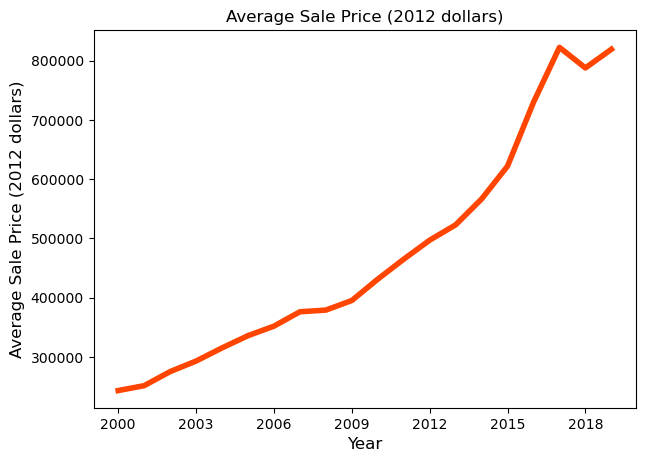

In [33]:
avg_sale_df.plot(x='Year', y='Average Sale Price', color='orangered', linewidth=4, legend=False)
plt.ylabel('Average Sale Price (2012 dollars)', fontsize=12)
plt.xlabel('Year', fontsize=12)
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)
plt.title('Average Sale Price (2012 dollars)', fontsize=12)

The average sale price in City of Toronto increased by 237% in the last two decades, with 62% increase between 2000 and 2009, but a more dramatic 90% increase in the last 10 years.



# Factors 
Many factors can be attributed to such  increase, and after a quick initial review of the literature available publically, and in the interest of brevity I choose to work with the following four most common factors. 


## 1. Stock: Supply and Demand


### Demand 
Demand can be measured by understanding the number of people moving in and out of the province. So, immigration, emmigration, birth rates, mortality, fertility rates affect the demand of houses. In sum, I look at the population numbers for the City of Toronto using Census data for the last 20 years[<sup>2</sup>](#fn2).

The bar chart below shows change in population for each Census year. 

In [4]:
pop_df = pd.read_csv("datasets/toronto-population.csv")
pop_df['Change'] = pop_df['Population'].diff()
pop_df

,Year,Population,Change
0,2001,2481494,NaN
1,2006,2503281,21787.0
2,2011,2615060,111779.0
3,2016,2731571,116511.0


Text(0, 0.5, 'Change in population every census year')

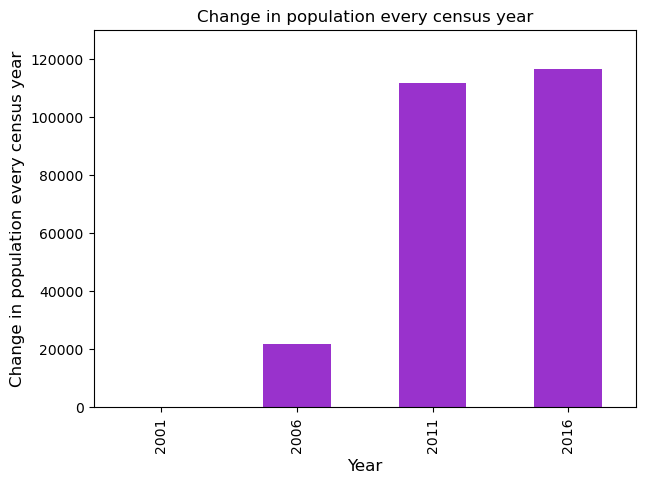

In [5]:
pop_df.plot(x='Year', y='Change', kind='bar', color='darkorchid', legend=False)
plt.ylim(0, 130000)
plt.title('Change in population every census year', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Change in population every census year', fontsize=12)

Population grew by 4.46% from 2011 to 2016, from 2,615,060 people to 2,731,571 in 2016, indicating an average annual growth close to 23000 people, which is comparable to the national growth rate of 5.9% [<sup>3</sup>](#fn3)



According to a projection study done by Ontario Ministry of Finance [<sup>7</sup>](#fn7),

> Within the GTA, Toronto’s population is projected to rise from 2.97 million in 2019 to 3.73 million in 2046, an increase of 25.9 per cent, slower than the provincial growth rate.


As population increases, demand and competition for housing is expected to increase. If the supply of houses is not able to match the demand, the housing prices will drive up. 



### Supply 


I would like to know the number of houses that will be available by year 2046. Since we know the population projected for 2046, we could project the number of houses ourselves, and compare! 


#### Existing House Stock
The table  [<sup>9</sup>](#fn9) below shows the number of existing houses that were counted as a part of the Census data. 




In [6]:
existing_df = pd.read_csv('datasets/toronto-existinghouses.csv')
existing_df

,Year,Existing Houses
0,2001,965554
1,2006,1894436
2,2011,1989705
3,2016,2135905


(0.0, 4000000.0)

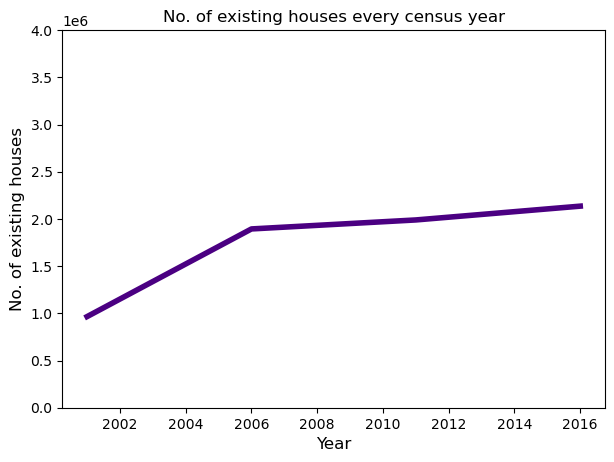

In [34]:
existing_df.plot(x='Year', y='Existing Houses', color='indigo', linewidth=4, legend=False)
plt.title('No. of existing houses every census year', fontsize=12)
plt.ylabel('No. of existing houses', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylim(0,4000000)

The number of houses that exist include all kinds of dwellings, apartments, detached, semi-detached, condos etc. These could include houses built previously, or resold. Existing houses implies houses that have already been built, and are occupied in that census year. 

In [8]:
X1= existing_df['Year'].values.reshape(-1,1)
Y1=existing_df['Existing Houses'].values
Y1

array([ 965554, 1894436, 1989705, 2135905], dtype=int64)

In [9]:
x_train1 = X1[-2:]
y_train1 = Y1[-2:]

x_test1 = X1[:-2]
y_test1= Y1[:-2]

model1=LinearRegression()
model1.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred1 = model1.predict(x_test1)
y_pred1

array([1697305., 1843505.])

In [11]:
model1.coef_

array([29240.])

In [12]:
x_future1 = np.arange(2021,2051,5).reshape(-1,1)
y_future1 = model1.predict(x_future1)

Text(0.5, 1.0, 'Number of Existing Prediction')

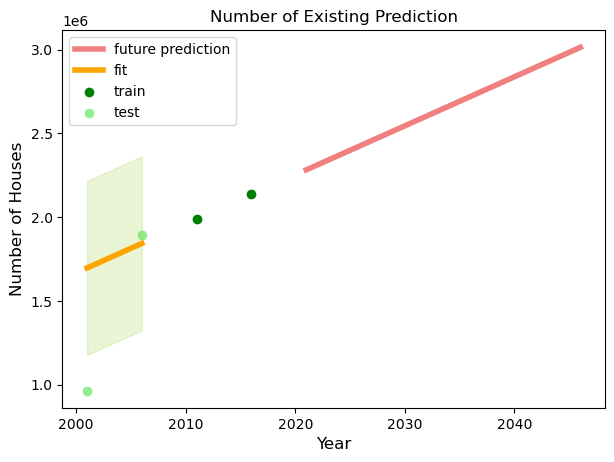

In [35]:
fig, ax = plt.subplots()
plt.scatter(x_train1,y_train1, color='green', label='train', )
plt.scatter(x_test1, y_test1, color='lightgreen', label='test')
plt.plot(x_future1, y_future1, linewidth=4, label='future prediction', color='lightcoral')
plt.plot(x_test1, y_pred1, linewidth = 4, label='fit', color='orange')

k1 =  np.sqrt(mean_squared_error(y_test1, y_pred1))
ax.fill_between(x_test1[:,0], y_pred1 - k1, y_pred1 + k1, color='yellowgreen', alpha=0.2)
plt.legend()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.title('Number of Existing Prediction', fontsize=12)

The linear regression fit is a very crude choice here, since the data is very less and it seems to plateau instead of following a linear rise. Even so, we get a an estimate of about 3,013,105  \\( \pm \\) 518,677 houses as the existing stock


#### New House Stock
I now look at the new stock of houses added over the years. 
The table [<sup>6</sup>](#fn6) below shows, for the years between 2000 and 2019, the number of New homes beginning to be constructed, those under construction and those already completed construction and are therefore available as supply for that year. 



In [14]:
supply_df = pd.read_csv('datasets/toronto-starts-underconstruction-completions.csv')
supply_df

,Year,Housing starts,Housing under construction,Housing completions
0,2000,38982,30273,33740
1,2001,41017,34305,37138
2,2002,43805,33094,45170
3,2003,45475,39907,38644
4,2004,42115,42148,39620
5,2005,41596,44305,39296
6,2006,37080,42654,38121
7,2007,33293,45470,30357
8,2008,42212,50823,36258
9,2009,25949,48361,28356


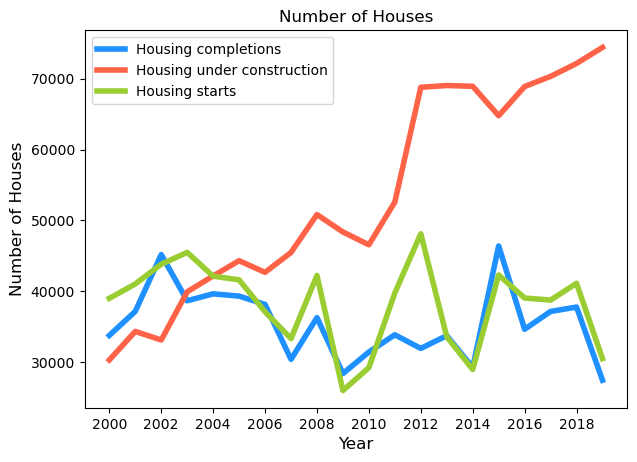

In [15]:
ax5 = supply_df.plot(x='Year', y='Housing completions', color='dodgerblue', linewidth=4)
supply_df.plot(ax=ax5, x='Year', y='Housing under construction', color='tomato', linewidth=4)
supply_df.plot(ax=ax5, x='Year', y='Housing starts', color='yellowgreen', linewidth=4)
plt.title('Number of Houses', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.locator_params(axis='x', nbins=12)

* The stock of houses that have completed construction, which means that they are available to buy, have not shown an appreciable increase over the last two decades in Toronto. In fact, no of houses completed in 2019 was lower than those completed in 2000! 

* New houses starting to be constructed have gone down, again 2019 numbers are lower than 2000. 

* The most alarming situation is that the number of houses under construction have increased very much, by 146% since 2000



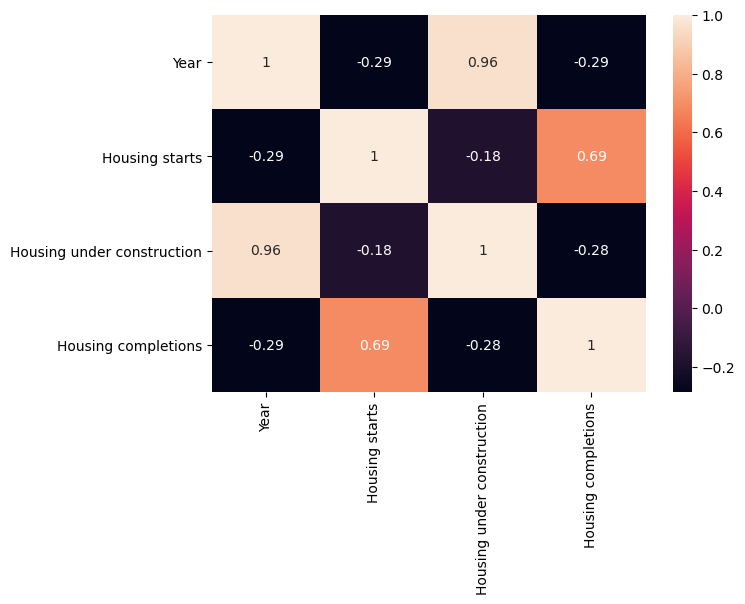

In [16]:
plt.figure()
sns.heatmap(supply_df.corr(), annot=True)

Using the heatmap above, I choose to work with No. of Houses under Construction (HUC). It is highly correlated with Year, and no other feature, so I can use it to model a simple Linear Regression projection for 2046. 

Between Housing started (HS), and Housing Completed (HC), I can only choose to work with one, because they are co-linear, but for now I will only work with HUC.

In [17]:
X= supply_df['Year'].values.reshape(-1,1)
Y=supply_df['Housing under construction'].values
Y

array([30273, 34305, 33094, 39907, 42148, 44305, 42654, 45470, 50823,
       48361, 46552, 52589, 68812, 69062, 68948, 64798, 68918, 70349,
       72175, 74451], dtype=int64)

Even though my dataset is small, I will divide it into test and training datasets, fit a simple one variable Linear Regression model and estimate the projected number of Houses that will be under construction in the future. 

In [18]:
x_train = X[:-10]
y_train = Y[:-10]

x_test = X[-10:]
y_test= Y[-10:]

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = model.predict(x_test)
y_pred

array([52823.86666667, 54949.2969697 , 57074.72727273, 59200.15757576,
       61325.58787879, 63451.01818182, 65576.44848485, 67701.87878788,
       69827.30909091, 71952.73939394])

In [20]:
model.coef_

array([2125.43030303])

In [21]:
x_future = np.linspace(2020,2050).reshape(-1,1)
y_future = model.predict(x_future)

Text(0.5, 1.0, 'Number of Houses under construction')

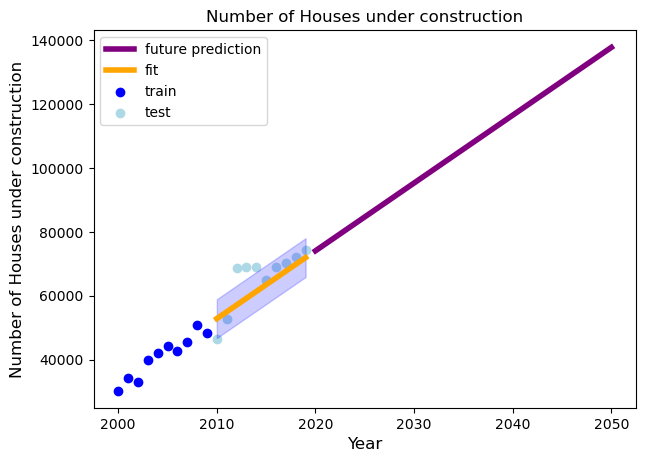

In [22]:
fig, ax = plt.subplots()
plt.scatter(x_train,y_train, color='blue', label='train', )
plt.scatter(x_test, y_test, color='lightblue', label='test')
plt.plot(x_future, y_future, linewidth=4, label='future prediction', color='purple')
plt.plot(x_test, y_pred, linewidth = 4, label='fit', color='orange')

k =  np.sqrt(mean_squared_error(y_test, y_pred))
ax.fill_between(x_test[:,0], y_pred - k, y_pred + k, color='blue', alpha=0.2)
plt.legend()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Houses under construction', fontsize=12)
plt.title('Number of Houses under construction', fontsize=12)

In the plot above, the blue points mark the training dataset, while the lightblue points mark the testing dataset. The orange line is the best fit Linear model to the dataset, and the light shading is the mean squared error. The purple line depicts the future prediction values for houses under construction. 

If we assume that the mean squared error remains the same, and that nothing changes policy wise, the number of houses that remain under construction will continue to increase at an alarming rate!





**Between 2011 and 2016, according to the Census results [above](#Demand) , we added 1.17 million. The projection for 2046 is 3.73 million people.
In 2046, the number of houses still under construction are estimated to be 138,000 \\( \pm \\) 6080 houses. 
The number of houses existing will be 3,013,105  \\( \pm \\) 518,677.**

The numbers here almost match. But looking at the crude estimates and error bars, it looks like we are going to be in deficit! 



## 2. Income

Lets take a look at how the median income of households has changed, and compare that to the ownership costs of a typical home in Toronto. 

In [23]:
med_income_df = pd.read_csv('datasets/toronto-median-income.csv')
med_income_df['median income (all households)'] = med_income_df['median income (all households)'].str.replace(',', '').astype(int)
med_income_df

,year,median income (all households)
0,2001,57900
1,2002,58200
2,2003,58500
3,2004,60100
4,2005,61800
5,2006,63800
6,2007,66560
7,2008,68120
8,2009,66790
9,2010,68110


In [24]:
benchmark_household_df = pd.read_csv('datasets/MLS-BenchmarkPrices-AllHouseholdTypes-composite.csv')
benchmark_household_df

,Year,Composite Benchmark Price
0,2005,313984
1,2006,329542
2,2007,348442
3,2008,361567
4,2009,362500
5,2010,399434
6,2011,424734
7,2012,453500
8,2013,471834
9,2014,507409


Text(0.5, 1.0, 'Price to Income Ratio')

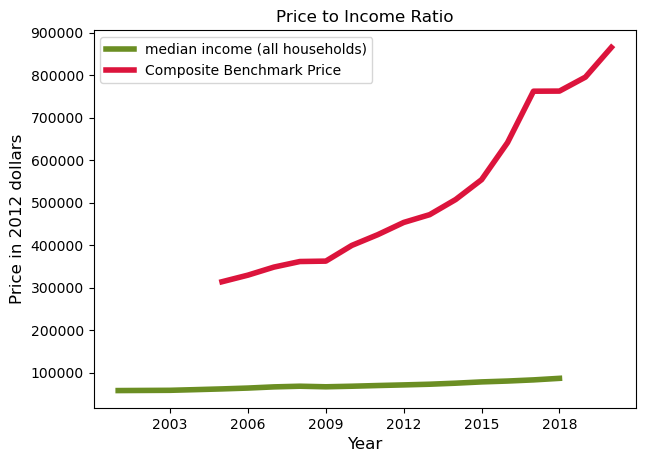

In [37]:
ax = med_income_df.plot(x='year', y='median income (all households)',  color='olivedrab', linewidth=4)
benchmark_household_df.plot(ax=ax, x='Year', y='Composite Benchmark Price' , color='crimson', linewidth=4)
listofyears = np.arange(2000, 2020)
plt.xticks(listofyears)
plt.locator_params(axis='x', nbins=9)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price in 2012 dollars', fontsize=12)
plt.title('Price to Income Ratio', fontsize=12)

Taking into consideration the growth between years 2005 to 2018 (for which we have both income and ownership cost data), median household **income grew only 40% while average home ownership costs grew 143%**.

This is a huge gap! For overcoming this gap, atleast two people are required to earn median (or above) incomes in a household to carry forward a typical 5 year mortgage. 

This implies that people in the low wage bracket (below median incomes) will have a hard time affording a place to live on their own. This **shifts the burden to mortgage financing as the more important factor in driving demand - and thus home prices.** 




## 3. Lending Rates 

A look at the lending rates for mortgages. A lowered mortgage lending rate and relaxed insurance rules allow for more people to enter the market. Thus driving up the demand, which if not increased in proportion to the supply, home prices will increase! 

A more accessible credit is kind of like an incentive for people to stop renting, and actually buying and calling a home theirs, by taking advantage of more flexible and affordable borrowing terms. 


In [26]:
lend_rate_df = pd.read_csv('datasets/canada-lendingrates.csv')
lend_rate_df

,Year,Lending Rate
0,2000,8.20
1,2001,7.18
2,2002,6.70
3,2003,6.04
4,2004,5.80
5,2005,5.48
6,2006,5.98
7,2007,6.36
8,2008,6.41
9,2009,5.06


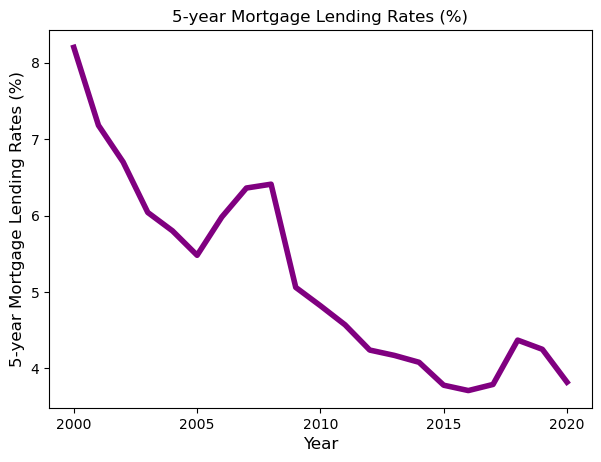

In [38]:
lend_rate_df.plot(x='Year', y='Lending Rate', legend=False, color='purple', linewidth=4)
plt.title('5-year Mortgage Lending Rates (%)', fontsize=12)
plt.ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.locator_params(axis='x', nbins=5)

The above graph shows the steep decline of mortgage lending rates in the last two decades, with a couple of local maxima around the time of recession in 2008 and a smaller one around 2018, before it falls further in 2020 during Covid-19 pandemic. 


A lower mortgage rate means an increase in buying power because a person can now borrow a larger sum of money, while keeping the monthly payments same! Driving up demand and thus increasing home prices. 

The chart below the shows the inverse relationship between lending rates and house prices. 

Text(0.5, 1.0, 'Comparison of Lending Rates and Sale Price of Houses')

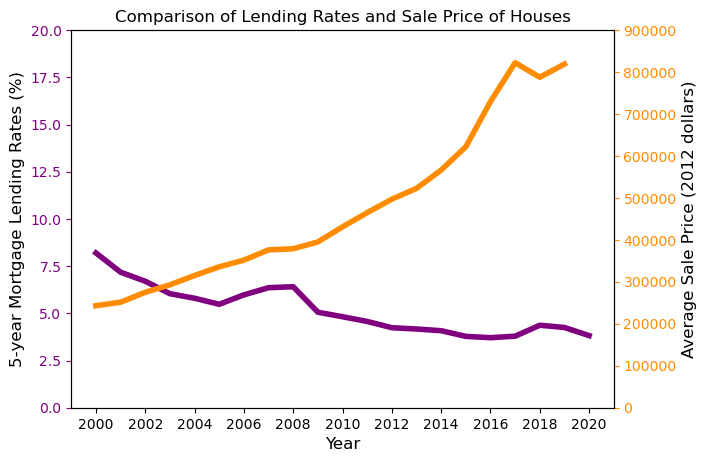

In [41]:
fig,ax = plt.subplots()

ax.plot(lend_rate_df['Year'],lend_rate_df['Lending Rate'], color='purple', linewidth=4)
ax.set_ylim(0, 20)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('5-year Mortgage Lending Rates (%)', fontsize=12)
ax.tick_params(axis='y', colors='purple')

ax2=ax.twinx()
ax2.plot(avg_sale_df['Year'], avg_sale_df['Average Sale Price'], color='darkorange', linewidth=4)
ax2.set_ylim(0, 900000)
ax2.set_ylabel('Average Sale Price (2012 dollars)', fontsize=12)
plt.locator_params(axis='x', nbins=12)
ax2.tick_params(axis='y', colors='darkorange')

plt.title('Comparison of Lending Rates and Sale Price of Houses', fontsize=12)

There is a strong inverse relationship between lending rates and sale price for the City of Toronto, but it is not a factor that can be used to understand the rise in home prices. This is because, **for an average buyer, the actual cost of owning a home has not changed significantly**. Even though houses are expensive today, than 20 years ago, monthly costs are similar today to those in 2000, at a much lower lending rate. 

So, this factor is not a direct cause of increasing house prices. 

# 4. Construction and Development costs

These include the costs incurred due to construction material and the labour wages, which are expected to change as economies change. As these costs increase, they can drive up the home prices. 

Let us look at the data, and see their significance. 

### Land prices

According to Statistics Canada, 

> The New Housing Price Index (NHPI) is a monthly series that measures changes over time in the contractors' selling prices of new residential houses, where detailed specifications pertaining to each house remain the same between two consecutive periods.

The graph below shows the New Housing Price Index (2016=100)[<sup>4</sup>](#fn4)




In [29]:
new_house_df = pd.read_csv('datasets/newhousingpriceindex.csv')
new_house_df

,Year,House Only,Land Only
0,2001,52.7,78.7
1,2002,55.5,78.9
2,2003,59.0,79.1
3,2004,63.2,80.9
4,2005,66.1,84.5
5,2006,68.9,86.9
6,2007,71.0,88.4
7,2008,74.0,90.1
8,2009,74.0,90.3
9,2010,77.0,89.4


Text(0.5, 0, 'Year')

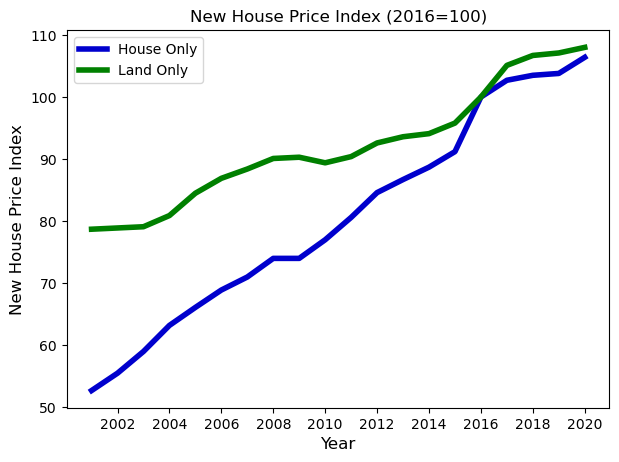

In [44]:
ax4 = new_house_df.plot(x='Year', y='House Only', color='mediumblue', linewidth=4)
new_house_df.plot(ax=ax4, x='Year', y='Land Only', color='green', linewidth=4)
plt.locator_params(axis='x', nbins=12)
plt.title('New House Price Index (2016=100)', fontsize=12)
plt.ylabel('New House Price Index', fontsize=12)
plt.xlabel('Year', fontsize=12)


The New Housing Price Index graph shows a steady increase in both Land and New House prices, with 2016 as the reference year at 100. The point to note is that house prices have had a much steeper increase in price than the land prices themselves. 


### Labour Cost

The cost of labour can also be a driving factor for higher home prices in Toronto. Labour can be costly in highly sought after locations, such as metropolitan areas like Toronto.

The table below shows the Construction Union Wage Rate Index [<sup>5</sup>](#fn5)


    Year  Wage Index
0   2000        82.7
1   2001        84.8
2   2002        87.5
3   2003        89.7
4   2004        92.5
5   2005        95.5
6   2006        98.0
7   2007       100.0
8   2008       104.0
9   2009       107.8
10  2010       110.7
11  2011       113.5
12  2012       116.4
13  2013       119.4
14  2014       122.3
15  2015       125.9
16  2016       128.5
17  2017       130.7
18  2018       132.7


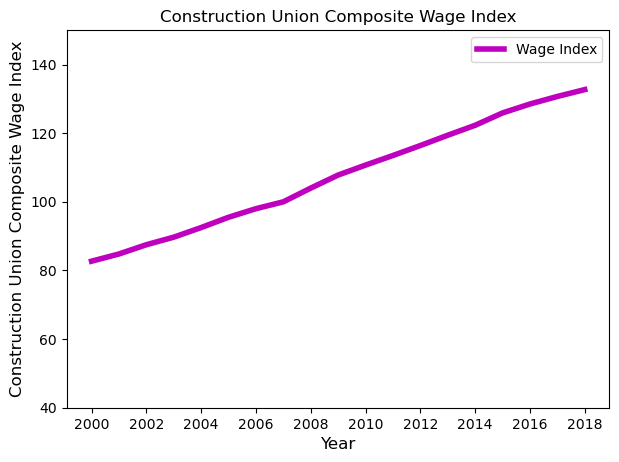

In [45]:
wage_df = pd.read_csv('datasets/toronto-wageindex.csv')
print(wage_df)
wage_df.plot(x='Year', y ='Wage Index', color='m', linewidth=4 )
plt.ylabel('Construction Union Composite Wage Index', fontsize=12)
plt.title('Construction Union Composite Wage Index', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylim(40,150)
plt.locator_params(axis='x', nbins=12)

The construction union composite wage index shows an increase by 60%. But since they only account for ............

### Development Charges 

Development charges that fund the infrastructure of the city itself, have also increased. I compare the development charges as a fraction of the increase in house prices for two years 2002 and 2010. 

   Year  Avg House Price  Avg Development Charge
0  2002           275231                    5148
1  2010           431262                   12281


Text(0.5, 0, 'Year')

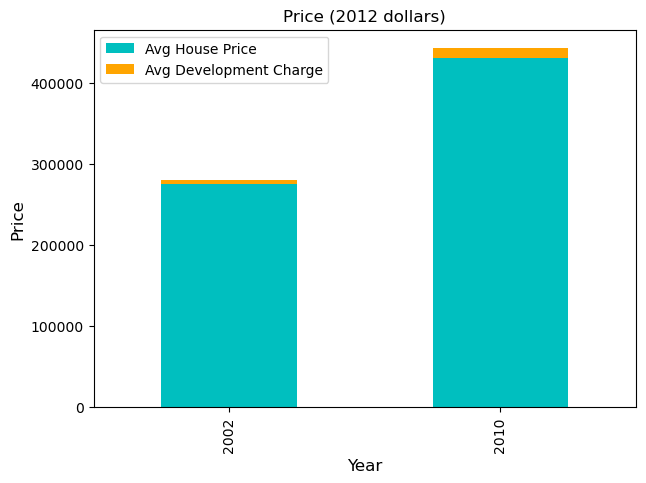

In [47]:
dev_df = pd.read_csv('datasets/toronto-devcharges.csv')
print(dev_df)
ax = dev_df.plot.bar(x='Year', stacked=True, color={'orange', 'c'})
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Price (2012 dollars)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

In 2002, development charge was 1.9% of the average home price, while in 2010 it was 2.9%, an increase of 140%. 

The increase in DC 7133 while the increase in house price was 156031, giving development charges an increase fraction of 4.6% only. 
Therefore, Between 2002 and 2010, even though the average house price increased by 57%,  the fractional increase in development charges is very small. 

Thus, **the increase in development charges accounts for only 4.6% of the increase in home prices, which is very insignificant!** 


# Conclusion

We examined many factors affecting Toronto's housing market including population growth, income trends, stock of houses (new, existing and in the pipeline), labour and development costs, land prices and mortgage lending rates. 

While all of these factors contribute in the increase of house prices, they do so in varying degrees of time and  intensity. 

* Immense population growth in the City of Toronto, by 4 to 5% between 2011 and 2016, projected to grow by 26% by 2046, is a big factor in driving up demand and thus the prices of the house. The crude [estimates](#New-House-Stock) already show a deficit in the available housing. 

* Median incomes have not increased in proportion to the home ownership costs. So the price to income ratio is high in Toronto. This is not favourable to the homebuyer, and thus they turn to mortage financing options, which means that lending rates and mortgage rules will drive the home prices. 

* The mortgage rules seem to have relaxed in the last decade, dramatically. This does make ownership a little easy for the average homebuyer, however, the actual costs have really not changed. It is easier to get a mortgage now, so that does drive the demand up, and can increase the house prices further. But this is not a strong factor, since the actual costs have not changed significantly. 

* Land, Labour and Development charges have increased over the years, but they are the not the main drivers of increase in house prices. The fraction of costs they represent is very less. 


## Most important factor for rise in house prices 
Given only 6 hours worth of initial data analysis and based on the data obtained, I say the biggest factor in driving up prices is 

* **Demand, and the comparably less supply of housing stock.** By 2046, a population of 3.73 million people needs to be supported. The house stock projections show a deficit in supply. At the lower end, only about 2.5 million houses will exist, with about 140 thousand homes still under construction. For the city of Toronto, where demands for rental homes with single occupancy increasing much more than family homes, these deficit numbers are alarming! 


#### If I had more time, 


* I would be interested to look at land prices in greater detail. Land prices are expected to vary according to the location in the city. Plus, I would look at how Greenbelt areas have restricted access to Residential plans, and if that drives up the house prices by restricting land availability. I would expect it to do that. 

* I would look at lending rates more closely. Are there any correlations between new relaxed mortgage rules announcements made by public and private companies and the house prices?

* I would look at the demographics of the population in more detail. What is the distribution of household types over age groups and locations? It is expected that younger age groups will be more interested in locations near to the subway, malls and downtown offices, while the older age groups would not mind buying a house in a car-accessible neighbourhood. 

* I would also look at the distribution of the kind of houses in the city of Toronto. Apartments, detached, semi-detached, row units, affordable housing etc, all are expected to have different trends in demand, supply and mortages. The younger populations, for example, might be interested in single bedroom apartments near to work, while a family of 5 would be more interested to have a detached home away from the city center. 


### Sources of Error

* **Small Datasets**: The datasets I have obtained have very little data points to actually model trends. Like the dataset for existing house counts has only 4 data points, out of which I worked with 2 data points to train my linear regression model, and 2 to test. The data actually shows a plateau, and depending on the choice of points I take, it can change its projections. 
  
* **Averages and Medians**: The data obtained from various public sources referenced [below](#References) was many times at a monthly scale, and was not seasonally adjusted. So for brevity and time constraints, I had to average of all the months to work with only annual values. For the case of housing, I have averaged over multiple kinds of housing units. Thus, these averages might not represent the whole picture.

* **Sampling Error**: The data obtained by Statistics Canada reports sampling errors in the surveys. The response rate varies from 70 to 89% percent. 


## Policy recommendations 

Given my limited expertise in the field, and the analysis done, I recommend 

* New policy to finish construction of houses in a stipulated amount of time and short time scales of 3 years or less - The number of houses that have remained under construction have increased very steeply. The crude [estimates](#New-House-Stock) made above show a deficit in housing, and thus we need expedited construction rules. 
* Therefore, one can think of a policy where a typical amount of time is awarded to each project that starts to build and the project should be completed in that time. 
* One can follow Agile Methods of Software Development, where bigger housing projects like multiple condo buildings that take longer, can be built in stages. Plans can be revised every year. 
* Following the Agile Method again, housing projects can be made bite-sized right from the beginning, so that if the time runs out, the portions complete will atleast be available for the market. 



# References



<span id="fn8"> 1. City of Toronto: http://www.incentiveworksshow.com/wp-content/uploads/2013/02/IW13_GTA_Map.pdf </span>


<span id="fn1">2. Source: Toronto Regional Real Estate Board Historic Archive </span>


<span id="fn2">3. Sources:
(a) "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2006 and 2001 censuses - 100% data". Statistics Canada, 2006 Census of Population. 
(b) "Population and dwelling counts, for Canada, census metropolitan areas, census agglomerations and census subdivisions (municipalities), 2011 and 2006 censuses". Statistics Canada, 2011 Census of Population.
(c) "Toronto population count". Statistics Canada, 2016 Census of Population. </span>



<span id="fn3">4. Source:  Statistics Canada: https://www12.statcan.gc.ca/census-recensement/2011/as-sa/fogs-spg/Facts-cma-eng.cfm?LANG=Eng&GK=CMA&GC=535) </span>




<span id="fn4">5. Source: Statistics Canada. Table 18-10-0205-01 New housing price index, monthly</span>


<span id="fn5">6. Source: Statistics Canada. Table 18-10-0051-01 Construction union wage rates index, monthly</span>



<span id="fn6">7. Source: Statistics Canada. Table 34-10-0134-01 Canada Mortgage and Housing Corporation, housing starts, under construction and completions in selected census metropolitan areas, annual https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3410013401</span>

<span id="fn7">8. Source: Ontario Population Projections Update, 2019–2046 https://www.fin.gov.on.ca/en/economy/demographics/projections/ </span>


<span id="fn9">9. Source: Statistics Canada, Dwelling Counts, 2001, 2006, 2011, 2016 Census Data </span>